In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import seaborn

%matplotlib inline

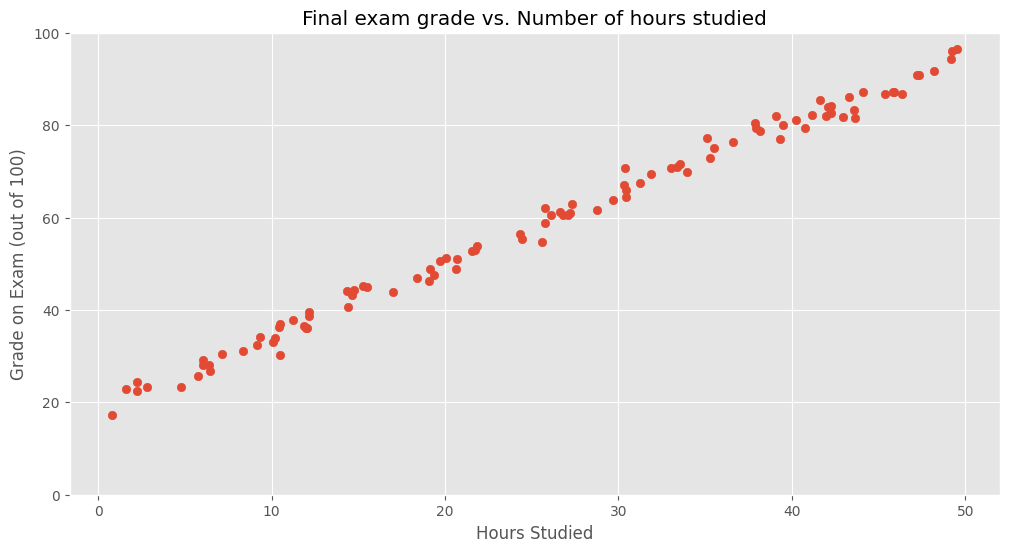

In [ ]:
def true_fn(x):
    return min(100, 1.5 * x + 20 + np.random.normal(0, 2))

xs = np.random.uniform(0, 50, size=100)
ys = np.array([true_fn(x) for x in xs])

plt.style.use('ggplot')
plt.figure(figsize=(12, 6))
plt.scatter(xs, ys)
plt.ylim(0, 100)
plt.title("Final exam grade vs. Number of hours studied")
plt.xlabel("Hours Studied")
plt.ylabel("Grade on Exam (out of 100)")
plt.show()


In [6]:
lm = LinearRegression()
lm.fit(xs.reshape(-1, 1), ys)

LinearRegression()

In [56]:
lm.coef_, lm.intercept_

(array([1.53038815]), np.float64(19.184126225556405))

In [8]:
y_preds = lm.predict(xs.reshape(-1, 1))
mean_squared_error(ys, y_preds)

3.3940376333660525

In [70]:
z = np.poly1d(np.polyfit(xs,ys,12))

In [54]:
knn = KNeighborsRegressor(n_neighbors=2)
knn.fit(xs.reshape(-1, 1), ys)

KNeighborsRegressor(n_neighbors=2)

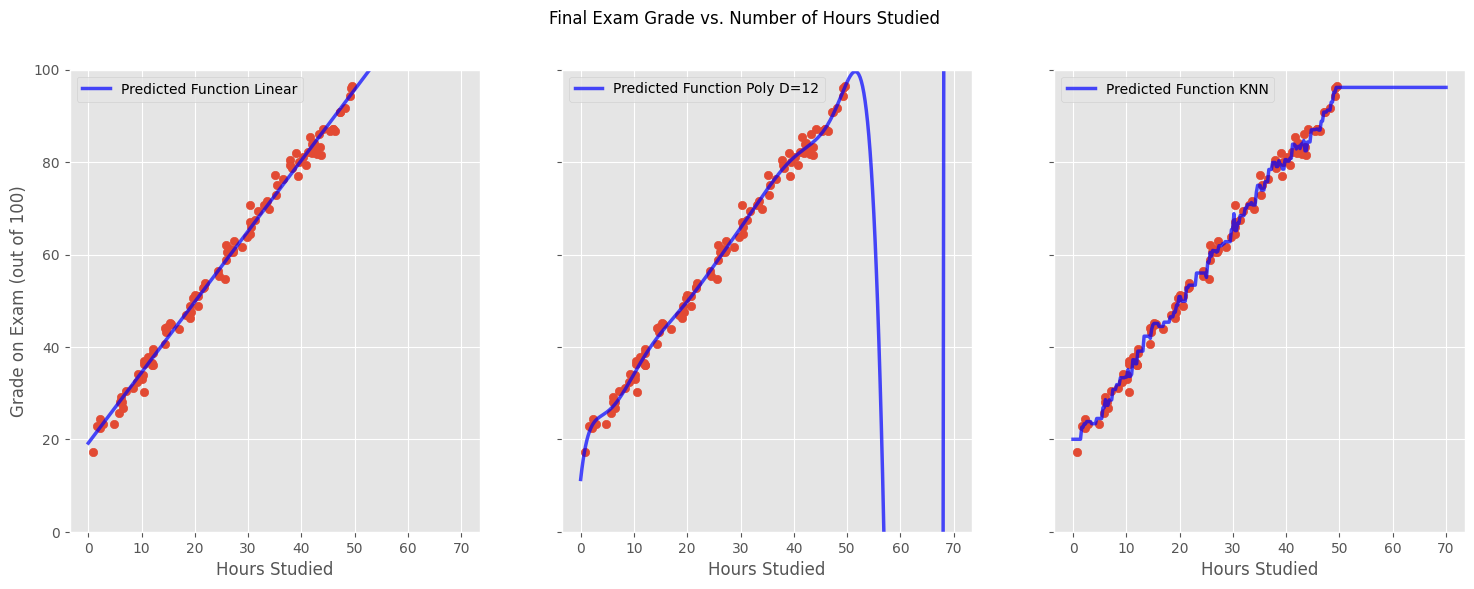

In [72]:
x_smooth = np.linspace(0, 70, 300)
y_plot_1 = lm.predict(x_smooth.reshape(-1, 1))
y_plot_2 = [z(x) for x in x_smooth]
y_plot_3 = knn.predict(x_smooth.reshape(-1, 1))


fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
plt.style.use('ggplot')

for ax, y_plot, label in zip(axes, [y_plot_1, y_plot_2, y_plot_3], ['Predicted Function Linear', 'Predicted Function Poly D=12', 'Predicted Function KNN']):
    ax.scatter(xs, ys)
    ax.plot(x_smooth, y_plot, c='blue', label=label, lw=2.5, alpha=0.7)
    ax.set_ylim(0, 100)
    ax.set_xlabel("Hours Studied")
    ax.legend()

axes[0].set_ylabel("Grade on Exam (out of 100)")
fig.suptitle("Final Exam Grade vs. Number of Hours Studied")

plt.show()
